In [3]:
import numpy as np 
import pandas as pd 
from classLib_yash import *
import random

import matplotlib.pyplot as plt

In [5]:

randompoints= [] # generating random point between 0 and 1
for i in range(1000): 
    a=[np.round(random.random(),4), np.round(random.random(),4)]
    randompoints.append(a)
allWaypoint = [] #here selecting the points which have a distance of more than 'a' 
for j in range(len(randompoints)):
    a=[]
    for k in range(j+1,len(randompoints)):
        s=np.linalg.norm(np.array(randompoints[j])-np.array(randompoints[k])) # not efficient way to claculate distance of one point from all others
        a.append(s)
    if all(i>0.16 for i in a):
        allWaypoint.append(randompoints[j])
print('no of waypoints:', len(allWaypoint))
wpList = allWaypoint[:15] #need 15 waypoints

wpList=np.round(wpList,4)
print(wpList, len(wpList))


no of waypoints: 14
[[0.9241 0.2361]
 [0.4336 0.0355]
 [0.9717 0.4939]
 [0.1068 0.1774]
 [0.6679 0.1085]
 [0.2458 0.3653]
 [0.7334 0.3651]
 [0.885  0.9104]
 [0.4505 0.8425]
 [0.1501 0.7677]
 [0.0095 0.4959]
 [0.6794 0.8776]
 [0.9555 0.0014]
 [0.2581 0.0587]] 14


In [7]:
wpN = ['wpA','wpB','wpC','wpD','wpE','wpF','wpG','wpH','wpI', 'wpJ','wpK','wpL','wpM', 'wpN','wpO','wpP']
wpNameList=wpN[:len(wpList)]
waypointList =[]
for i in range(len(wpList)):
    waypointList.append(WayPoint(wpNameList[i],wpList[i])) #list containing waypoint class elements


In [9]:
##################################    AIRWAYS  #####################################################
# # Here, airway is a subclass of wayPoint class and every 
# wayPointInfo=[]
# for i in range(len(waypointList)):
#     wayPointInfo.append([waypointList[i].name,waypointList[i].x,waypointList[i].y])
# print(wayPointInfo)
airwayList=[]
# sampled_airways=[]
for i in range(10): #no of airways chosen 8 at random
    points = random.sample(waypointList,2)
    # print(points[0])
    airwayList.append(Airways( points[0].name +' - '+ points[1].name, points[0], points[1]))
    # sampled_airways.append(points)
        

In [11]:
print(airwayList[0])

wpH - wpL:  start coords  0.885 0.9104


In [13]:
for i in range(len(waypointList)):
    print(waypointList[i])

waypoint class:wpA  x co-ord: 0.9241  y co-ord: 0.2361
waypoint class:wpB  x co-ord: 0.4336  y co-ord: 0.0355
waypoint class:wpC  x co-ord: 0.9717  y co-ord: 0.4939
waypoint class:wpD  x co-ord: 0.1068  y co-ord: 0.1774
waypoint class:wpE  x co-ord: 0.6679  y co-ord: 0.1085
waypoint class:wpF  x co-ord: 0.2458  y co-ord: 0.3653
waypoint class:wpG  x co-ord: 0.7334  y co-ord: 0.3651
waypoint class:wpH  x co-ord: 0.885  y co-ord: 0.9104
waypoint class:wpI  x co-ord: 0.4505  y co-ord: 0.8425
waypoint class:wpJ  x co-ord: 0.1501  y co-ord: 0.7677
waypoint class:wpK  x co-ord: 0.0095  y co-ord: 0.4959
waypoint class:wpL  x co-ord: 0.6794  y co-ord: 0.8776
waypoint class:wpM  x co-ord: 0.9555  y co-ord: 0.0014
waypoint class:wpN  x co-ord: 0.2581  y co-ord: 0.0587


In [15]:
ac_per_scenario = 8  # just a random number to have no of aircraft in one scenario
aircraftList=[]
aircraft_name=np.arange(ac_per_scenario)
for i in range(ac_per_scenario):
    point = np.random.choice(airwayList)
    aircraft= Aircraft(aircraft_name[i],point)
    aircraftList.append(aircraft)


In [17]:
aircraftList[0].route

'wpH - wpL'

In [19]:
d= Scenario(waypointList,airwayList)

In [21]:
d.waypointinfo()

[['wpA', 0.9241, 0.2361],
 ['wpB', 0.4336, 0.0355],
 ['wpC', 0.9717, 0.4939],
 ['wpD', 0.1068, 0.1774],
 ['wpE', 0.6679, 0.1085],
 ['wpF', 0.2458, 0.3653],
 ['wpG', 0.7334, 0.3651],
 ['wpH', 0.885, 0.9104],
 ['wpI', 0.4505, 0.8425],
 ['wpJ', 0.1501, 0.7677],
 ['wpK', 0.0095, 0.4959],
 ['wpL', 0.6794, 0.8776],
 ['wpM', 0.9555, 0.0014],
 ['wpN', 0.2581, 0.0587],
 ['wpA', 0.9241, 0.2361],
 ['wpB', 0.4336, 0.0355],
 ['wpC', 0.9717, 0.4939],
 ['wpD', 0.1068, 0.1774],
 ['wpE', 0.6679, 0.1085],
 ['wpF', 0.2458, 0.3653],
 ['wpG', 0.7334, 0.3651],
 ['wpH', 0.885, 0.9104],
 ['wpI', 0.4505, 0.8425],
 ['wpJ', 0.1501, 0.7677],
 ['wpK', 0.0095, 0.4959],
 ['wpL', 0.6794, 0.8776],
 ['wpM', 0.9555, 0.0014],
 ['wpN', 0.2581, 0.0587]]

In [23]:
d.airwayinfo()

[[0.885, 0.9104, 0.6794, 0.8776],
 [0.6794, 0.8776, 0.4505, 0.8425],
 [0.9241, 0.2361, 0.1068, 0.1774],
 [0.6679, 0.1085, 0.9717, 0.4939],
 [0.1068, 0.1774, 0.4336, 0.0355],
 [0.2458, 0.3653, 0.4336, 0.0355],
 [0.0095, 0.4959, 0.9241, 0.2361],
 [0.4505, 0.8425, 0.0095, 0.4959],
 [0.1501, 0.7677, 0.4505, 0.8425],
 [0.9555, 0.0014, 0.2581, 0.0587],
 [0.885, 0.9104, 0.6794, 0.8776],
 [0.6794, 0.8776, 0.4505, 0.8425],
 [0.9241, 0.2361, 0.1068, 0.1774],
 [0.6679, 0.1085, 0.9717, 0.4939],
 [0.1068, 0.1774, 0.4336, 0.0355],
 [0.2458, 0.3653, 0.4336, 0.0355],
 [0.0095, 0.4959, 0.9241, 0.2361],
 [0.4505, 0.8425, 0.0095, 0.4959],
 [0.1501, 0.7677, 0.4505, 0.8425],
 [0.9555, 0.0014, 0.2581, 0.0587]]

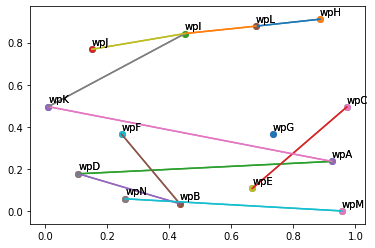

In [24]:
d.plot()